In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)  # FutureWarningを消している

In [2]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

In [3]:
# 渋谷駅（スクランブル交差点）
shibuya_eki = 35.65952515598417, 139.70055390184527
# HENGEのビル
henge = 35.65495728145334, 139.69494603459512

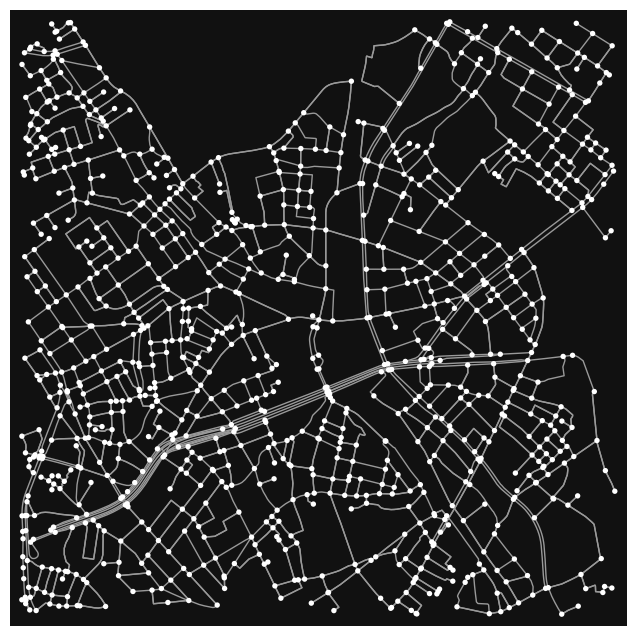

In [4]:
# 渋谷駅を中心とした半径1000mの地図を表示
dist = 1000  # meters
G = ox.graph_from_point(center_point=shibuya_eki, 
                        dist=dist, 
                        network_type="drive",
                       simplify=True
                       )
fig, ax = ox.plot_graph(G)

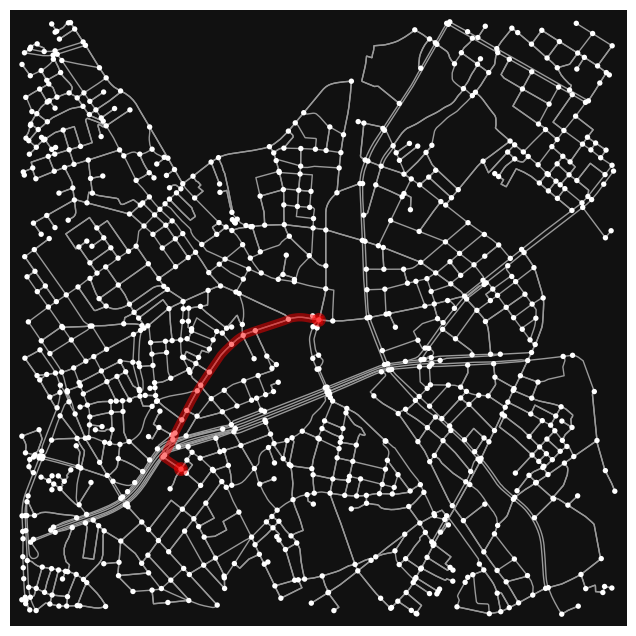

In [5]:
# 渋谷駅からHENGEまでの最短距離
start_node = ox.distance.nearest_nodes(G, shibuya_eki[1], shibuya_eki[0])
end_node = ox.distance.nearest_nodes(G, henge[1], henge[0])

route = ox.shortest_path(G, start_node, end_node)  # 最短経路を取得
fig, ax = ox.plot_graph_route(G, route, route_color='r', route_linewidth=6) # ルートを表示

In [11]:
# foliumを利用
import folium
fmap = ox.plot_graph_folium(G)
fmap.save(outfile="road_network.html")

new_fmap = ox.plot_route_folium(G, route, route_map=fmap, color="red")
folium.Marker(location=shibuya_eki, tooltip="start").add_to(new_fmap)
folium.Marker(location=henge, tooltip="end").add_to(new_fmap)
new_fmap.save(outfile="shortest_path_road_network.html")